✅ Found training history: ..\checkpoints\pandaset\training_history.json


### 🧾 Training Log (first few rows)

,epoch,train_loss,val_loss,train_miou,val_miou
0,1,0.288208,0.181584,0.456748,0.463923
1,2,0.201611,0.198308,0.492664,0.459707
2,3,0.182773,0.208919,0.506459,0.463010
3,4,0.169853,0.206320,0.519091,0.465144
4,5,0.160242,0.226376,0.536126,0.461715


### ✅ Best Epoch Summary

- **Best Epoch:** 4<br>- **Validation mIoU:** 0.4651<br>- **Validation Loss:** 0.2063

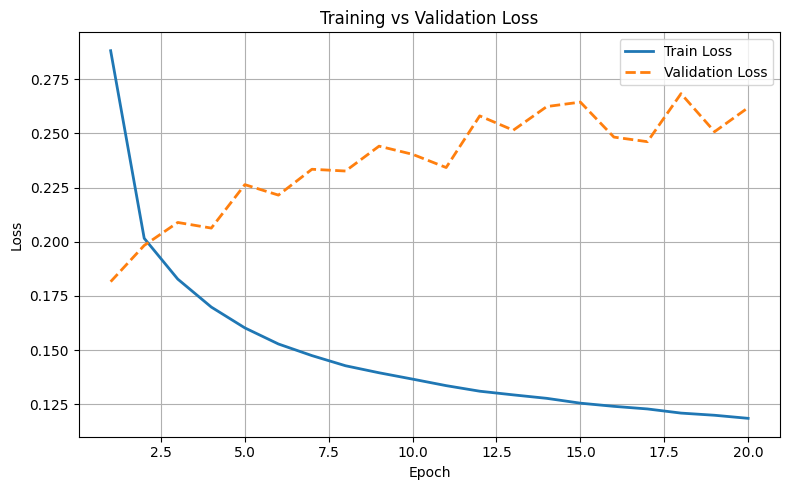

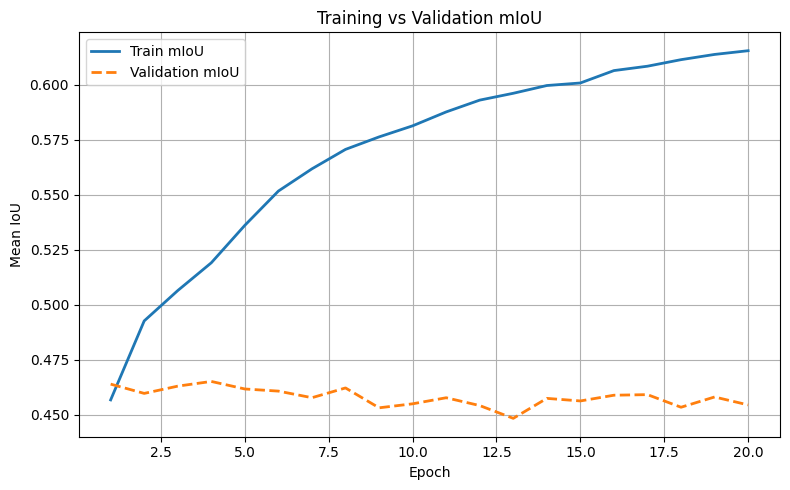


📊 Summary Statistics:
- Train mIoU improvement: 0.159
- Validation mIoU std deviation: 0.004
- Final Train Loss: 0.118
- Final Val Loss: 0.262
✅ Saved detailed epoch log to: ..\checkpoints\pandaset\training_summary.csv


In [1]:
# ================================================================
#  Analyze Training History for PandaSet Lightweight Model
# ================================================================

import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ------------------------------------------------
# Path setup (notebook is in /notebooks)
# ------------------------------------------------
HISTORY_PATH = os.path.join("..", "checkpoints", "pandaset", "training_history.json")

assert os.path.exists(HISTORY_PATH), f"❌ Could not find history file at {HISTORY_PATH}"
print(f"✅ Found training history: {HISTORY_PATH}")

# ------------------------------------------------
# Load training history JSON
# ------------------------------------------------
with open(HISTORY_PATH, "r") as f:
    history = json.load(f)

# Convert to DataFrame
epochs = list(range(1, len(history["train_loss"]) + 1))
df = pd.DataFrame({
    "epoch": epochs,
    "train_loss": history["train_loss"],
    "val_loss": history["val_loss"],
    "train_miou": history["train_miou"],
    "val_miou": history["val_miou"],
})

display(Markdown("### 🧾 Training Log (first few rows)"))
display(df.head())

# ------------------------------------------------
# Find best epoch based on validation mIoU
# ------------------------------------------------
best_idx = df["val_miou"].idxmax()
best_epoch = df.loc[best_idx, "epoch"]
best_miou = df.loc[best_idx, "val_miou"]
best_loss = df.loc[best_idx, "val_loss"]

display(Markdown(f"### ✅ Best Epoch Summary"))
display(Markdown(f"- **Best Epoch:** {best_epoch}<br>"
                 f"- **Validation mIoU:** {best_miou:.4f}<br>"
                 f"- **Validation Loss:** {best_loss:.4f}"))

# ------------------------------------------------
# Plot Training vs Validation Loss
# ------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(df["epoch"], df["train_loss"], label="Train Loss", linewidth=2)
plt.plot(df["epoch"], df["val_loss"], label="Validation Loss", linewidth=2, linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------
# Plot Training vs Validation mIoU
# ------------------------------------------------
plt.figure(figsize=(8,5))
plt.plot(df["epoch"], df["train_miou"], label="Train mIoU", linewidth=2)
plt.plot(df["epoch"], df["val_miou"], label="Validation mIoU", linewidth=2, linestyle="--")
plt.xlabel("Epoch")
plt.ylabel("Mean IoU")
plt.title("Training vs Validation mIoU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------------------------
# Optional: Compute key statistics
# ------------------------------------------------
improvement = df["train_miou"].iloc[-1] - df["train_miou"].iloc[0]
val_stability = df["val_miou"].std()

print("\n📊 Summary Statistics:")
print(f"- Train mIoU improvement: {improvement:.3f}")
print(f"- Validation mIoU std deviation: {val_stability:.3f}")
print(f"- Final Train Loss: {df['train_loss'].iloc[-1]:.3f}")
print(f"- Final Val Loss: {df['val_loss'].iloc[-1]:.3f}")

# ------------------------------------------------
# Optional: Save a summary CSV for later comparison
# ------------------------------------------------
summary_path = os.path.join("..", "checkpoints", "pandaset", "training_summary.csv")
df.to_csv(summary_path, index=False)
print(f"✅ Saved detailed epoch log to: {summary_path}")
